<a href="https://colab.research.google.com/github/anushapalisetty/Intel-Image-Classification/blob/main/Megh_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np 
import cv2
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from google.colab import drive
drive.mount('/content/drive',force_remount= True)

Mounted at /content/drive


In [10]:
classes=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
#Displaying theImages
%matplotlib inline



In [11]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(horizontal_flip=True,shear_range=0.2,  
    zoom_range=0.2, validation_split=0.1)


train_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='training'
    
)


validation_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='validation'
    
)

test_datagen = ImageDataGenerator()
test_generator=test_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_test/seg_test/',
      target_size=(150,150),
      batch_size=32,
      class_mode='sparse',
      seed=2209
)




Found 12667 images belonging to 6 classes.
Found 1406 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [12]:
SEED = 2209
import os
import random as rn
import numpy as np
import tensorflow as tf

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.compat.v1.set_random_seed(SEED)
rn.seed(SEED)

# **Convolutional Neural Network**

In [13]:
import tensorflow as tf
from keras import regularizers

model1=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
  
    tf.keras.layers.Flatten(),
       
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(6,activation='softmax')
])

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 146, 146, 16)      2320      
_________________________________________________________________
batch_normalization_10 (Batc (None, 146, 146, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 32)        4640      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 44, 44, 32)       

Epoch 1/150
198/198 [==============================] - 6123s 31s/step - loss: 1.8583 - accuracy: 0.2984 - val_loss: 2.0204 - val_accuracy: 0.4481
Epoch 2/150
198/198 [==============================] - 98s 493ms/step - loss: 1.2839 - accuracy: 0.4803 - val_loss: 1.3235 - val_accuracy: 0.5185
Epoch 3/150
198/198 [==============================] - 97s 489ms/step - loss: 1.0804 - accuracy: 0.5762 - val_loss: 1.6176 - val_accuracy: 0.4964
Epoch 4/150
198/198 [==============================] - 98s 494ms/step - loss: 0.9677 - accuracy: 0.6501 - val_loss: 0.7996 - val_accuracy: 0.7070
Epoch 5/150
198/198 [==============================] - 97s 489ms/step - loss: 0.8653 - accuracy: 0.7088 - val_loss: 0.9360 - val_accuracy: 0.7048
Epoch 6/150
198/198 [==============================] - 97s 489ms/step - loss: 0.8115 - accuracy: 0.7304 - val_loss: 0.8669 - val_accuracy: 0.7013
Epoch 7/150
198/198 [==============================] - 98s 494ms/step - loss: 0.7727 - accuracy: 0.7506 - val_loss: 0.7126 -

NameError: ignored

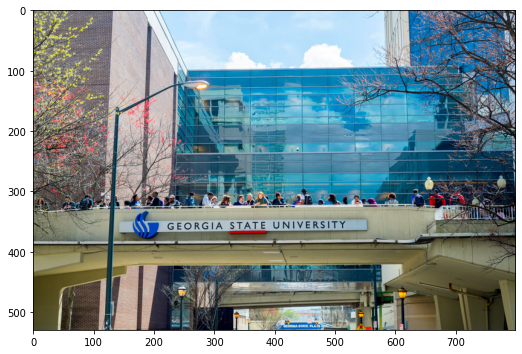

In [15]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit_generator(
  train_generator,
  epochs=150,
  validation_data=validation_generator,
  callbacks=[reduce],
  verbose=1
)

model1.save('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/meg_cnn_100.hd5')




accuracy=model1.evaluate_generator(test_generator, steps=len(test_generator)//32, callbacks=[reduce],verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])



df_cnn = pd.DataFrame(history1.history)      
# saving the dataframe  
df_cnn.to_csv('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/meg_cnn_100_History.csv')  


classes1=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
images=['georgia-state-university-1.png','forest.jpg','glacier.jpg','Pooru-Mountain.jpeg','Meg_Sea.jpg','Cali_street.jpg']
#images=['5.jpg','forest.jpg','glacier_2.jpg','28.jpg','171.jpg','69.jpg'] #- Perfect
nrows=3
ncols=3
j=0

path='/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_pred/seg_pred/'

plt.figure(figsize=[30,20])
for i, img in enumerate(images):
  labels={}
  sp=plt.subplot(nrows,ncols,i+1)
  #sp.axis('Off')
  image=mpimg.imread(path+img)
  plt.imshow(image)
  im_reshape=img_reshape(image)
  a=model1.predict(im_reshape).round(2)
  for j,label in enumerate(classes1):
      labels[classes1[j]]=a[0][j]
  sorted_d = sorted(labels.items(), key=operator.itemgetter(1),reverse=True)
  #print(sorted_d)


  if i%3==0 and i>=3:
    j=j+1
  sp.set_xlabel(sorted_d,fontsize=12)
  sp.title.set_text(classes1[i])
  

  
plt.show()




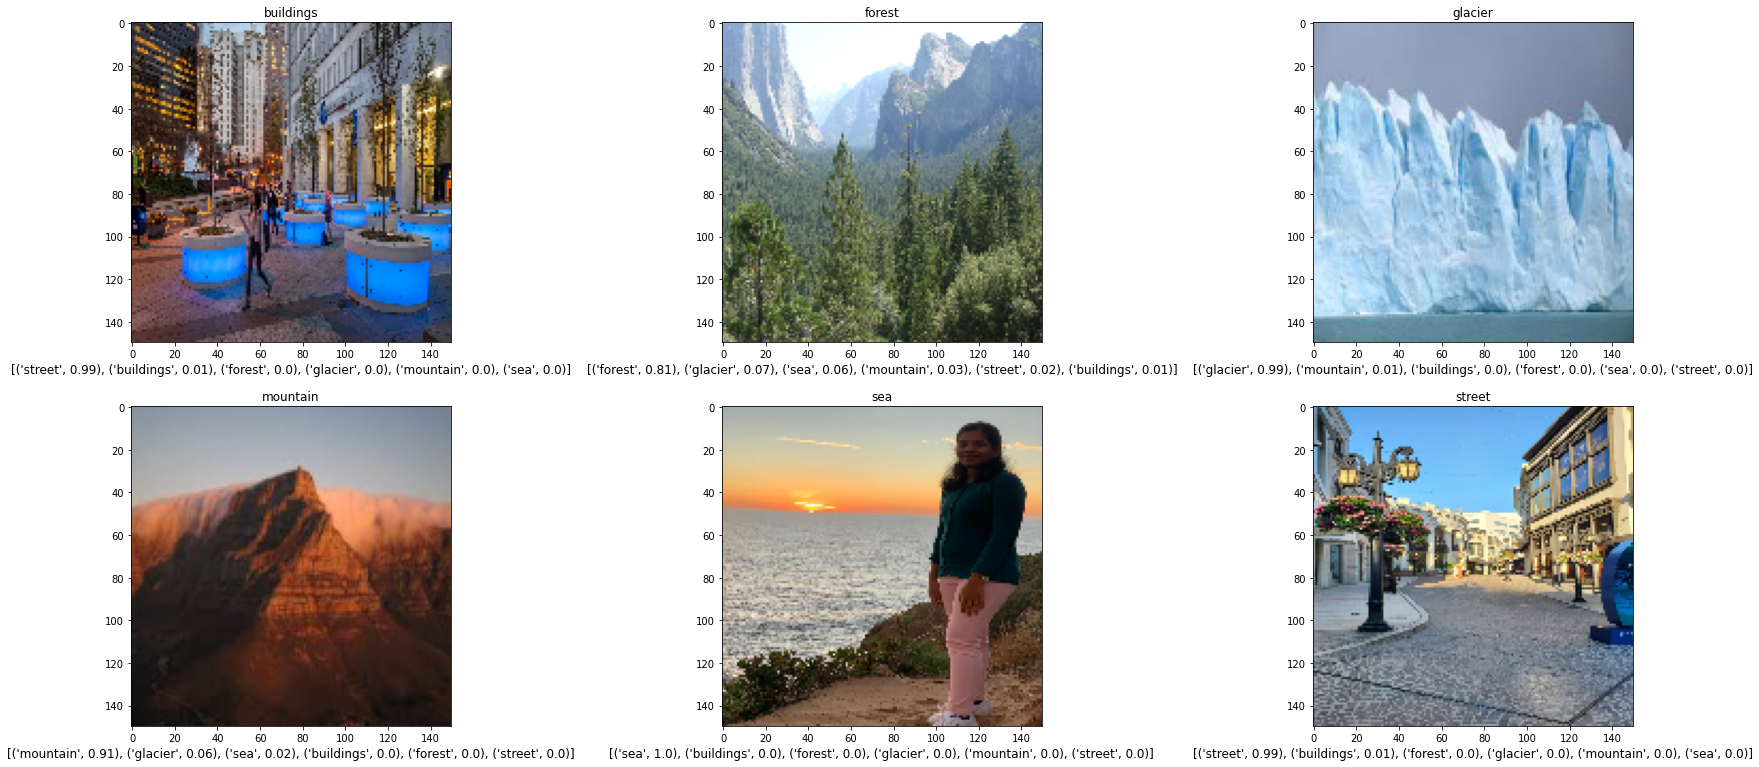

In [24]:
import numpy as np 
import cv2
import pandas as pd
import tensorflow as tf
from keras.models import Model
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def img_reshape(img):
  img=cv2.resize(img,(150,150))
  plt.imshow(img.reshape([150,150,3]))
  img = np.reshape(img,[1,150,150,3])
  return img


import operator
classes1=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
#images=['eon_building.jpeg','meg_forest.jpeg','glacier_1.jpeg','mountain_1.jpg','Anusha-Sea.jpeg','street_1.jpeg']
#images=['georgia-state-university-1.png','forest.jpg','glacier.jpg','Pooru-Mountain.jpeg','Meg_Sea.jpg','Cali_street.jpg']
#images=['25pp.jpg','yosimite_forest.png','6.jpg','28.jpg','Anusha-Sea.jpeg','holl_street.jpg']
images=['25pp.jpg','yosimite_forest.png','glacier_3.jpg','mountain_2.jpg','Anusha-Sea.jpeg','street_1.jpeg']
#images=['5.jpg','forest.jpg','glacier_2.jpg','28.jpg','171.jpg','69.jpg'] #- Perfect
nrows=3
ncols=3
j=0

path='/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_pred/seg_pred/'

plt.figure(figsize=[30,20])
for i, img in enumerate(images):
  labels={}
  sp=plt.subplot(nrows,ncols,i+1)
  #sp.axis('Off')
  image=mpimg.imread(path+img)
  plt.imshow(image)
  im_reshape=img_reshape(image)
  a=model1.predict(im_reshape).round(2)
  for j,label in enumerate(classes1):
      labels[classes1[j]]=a[0][j]
  sorted_d = sorted(labels.items(), key=operator.itemgetter(1),reverse=True)
  #print(sorted_d)


  if i%3==0 and i>=3:
    j=j+1
  sp.set_xlabel(sorted_d,fontsize=12)
  sp.title.set_text(classes1[i])
  

  
plt.show()

In [26]:
accuracy=model1.evaluate_generator(test_generator, steps=len(test_generator)//32, callbacks=[reduce],verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])

2/2 - 20s - loss: 0.3474 - accuracy: 0.9219
Accuracy of the model on the test set:  0.921875


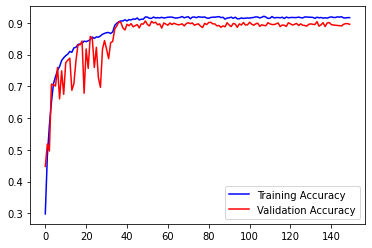

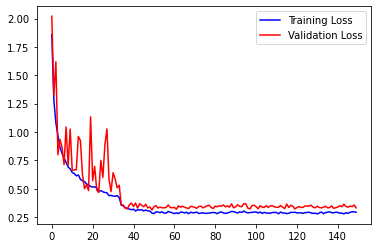

In [25]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs
 
#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

# **DenseNet121**

In [ ]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 
from keras.applications.densenet import DenseNet121
import keras


base_model1=DenseNet121(include_top=False, weights= 'imagenet',  input_shape=(150,150,3), pooling='avg')
base_model1.trainable = False

x = Dense(256, activation='relu')(base_model1.output)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

transfer_model1 = Model(base_model1.input, x) 
transfer_model1.compile(optimizer =keras.optimizers.SGD(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
history2 = transfer_model1.fit_generator(
            train_generator,
            steps_per_epoch=int(12632/64),
            epochs=50,
            validation_data=validation_generator,
            validation_steps=int(1402/64),
            callbacks=[reduce],
            verbose=1)

In [ ]:
accuracy1=transfer_model1.evaluate_generator(test_generator, steps=len(test_generator)//32,verbose=2)
print('Accuracy of the model on the test set: ',accuracy1[1])

In [ ]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history2.history['acc']
val_acc=history2.history['val_acc']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

# **ResNet50**

In [ ]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 
from keras.applications.resnet50 import ResNet50
import keras


base_model2=ResNet50(include_top=False, weights= 'imagenet',  input_shape=(150,150,3), pooling='avg')
base_model2.trainable = False

x = Dense(512, activation='relu')(base_model2.output)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

transfer_model2 = Model(base_model2.input, x) 
transfer_model2.compile(optimizer =keras.optimizers.SGD(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
history3 = transfer_model2.fit_generator(
            train_generator,
            steps_per_epoch=int(12632/64),
            epochs=50,
            validation_data=validation_generator,
            validation_steps=int(1402/64),
            callbacks=[reduce],
            verbose=1)

In [ ]:
accuracy2=transfer_model2.evaluate_generator(test_generator, steps=len(test_generator)//32,verbose=2)
print('Accuracy of the model on the test set: ',accuracy2[1])

In [ ]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history3.history['acc']
val_acc=history3.history['val_acc']
loss=history3.history['loss']
val_loss=history3.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()